## Final Project Submission

Please fill out:
* Student name: Erik Castro
* Student pace: Part-time
* Scheduled project review date/time: 14/01/2021  15:00
* Instructor name: Yish
* Blog post URL:


# Bank Personal Loan Modelling


This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

## Importing Libraries

In [1]:
## importing necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score, \
precision_score, recall_score, roc_auc_score, classification_report, plot_confusion_matrix, \
precision_score, accuracy_score, f1_score
from sklearn.metrics import plot_confusion_matrix,roc_curve, classification_report, accuracy_score 
# set random state
random_state = 0
import time
import xgboost as xgb
from xgboost import plot_importance
#from sklearn.pipeline import Pipeline


from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,train_test_split,cross_val_score

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC






from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

## Data Cleaning 

In [2]:
df = pd.read_csv('bank_personal_loan_modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

There are no null values

In [4]:
df.sample(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
704,705,56,32,129,94065,1,7.4,1,0,0,0,0,0,0
3800,3801,64,38,35,93955,1,0.5,3,0,0,0,0,1,0
1666,1667,51,25,190,95138,2,4.2,2,0,1,0,0,1,0
490,491,34,10,90,94303,2,2.7,1,0,0,0,0,1,0
4515,4516,29,3,49,94305,4,2.1,3,0,0,0,0,0,0


In [5]:
df.shape

(5000, 14)

In [53]:
df['ID'].value_counts().sum()

5000

In [6]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

## Basic EDA

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Here we can see that Experience has a negative value as minimun value, this cant happen, hence I will convert it to positive.

In [8]:
# Converting Negative values to postive in experience column.
df['Experience'] = df['Experience'].abs()

In [9]:
df['Experience'].describe().transpose()

count    5000.000000
mean       20.134600
std        11.415189
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

### Findings

There are different types of variables in this data, they are as follow: 
1. Categorical Variables: Education and Family  
2. Nominal variables: ID and Zip Code
3. Independent Variables: Age, Experience, Income, CCAvg, Mortgage
4. Binary Variables: Personal Loan, Cd Account, Credit Card, Online, Securities

## Advanced EDA

Independent variables boxplots. 


<Figure size 1080x720 with 0 Axes>

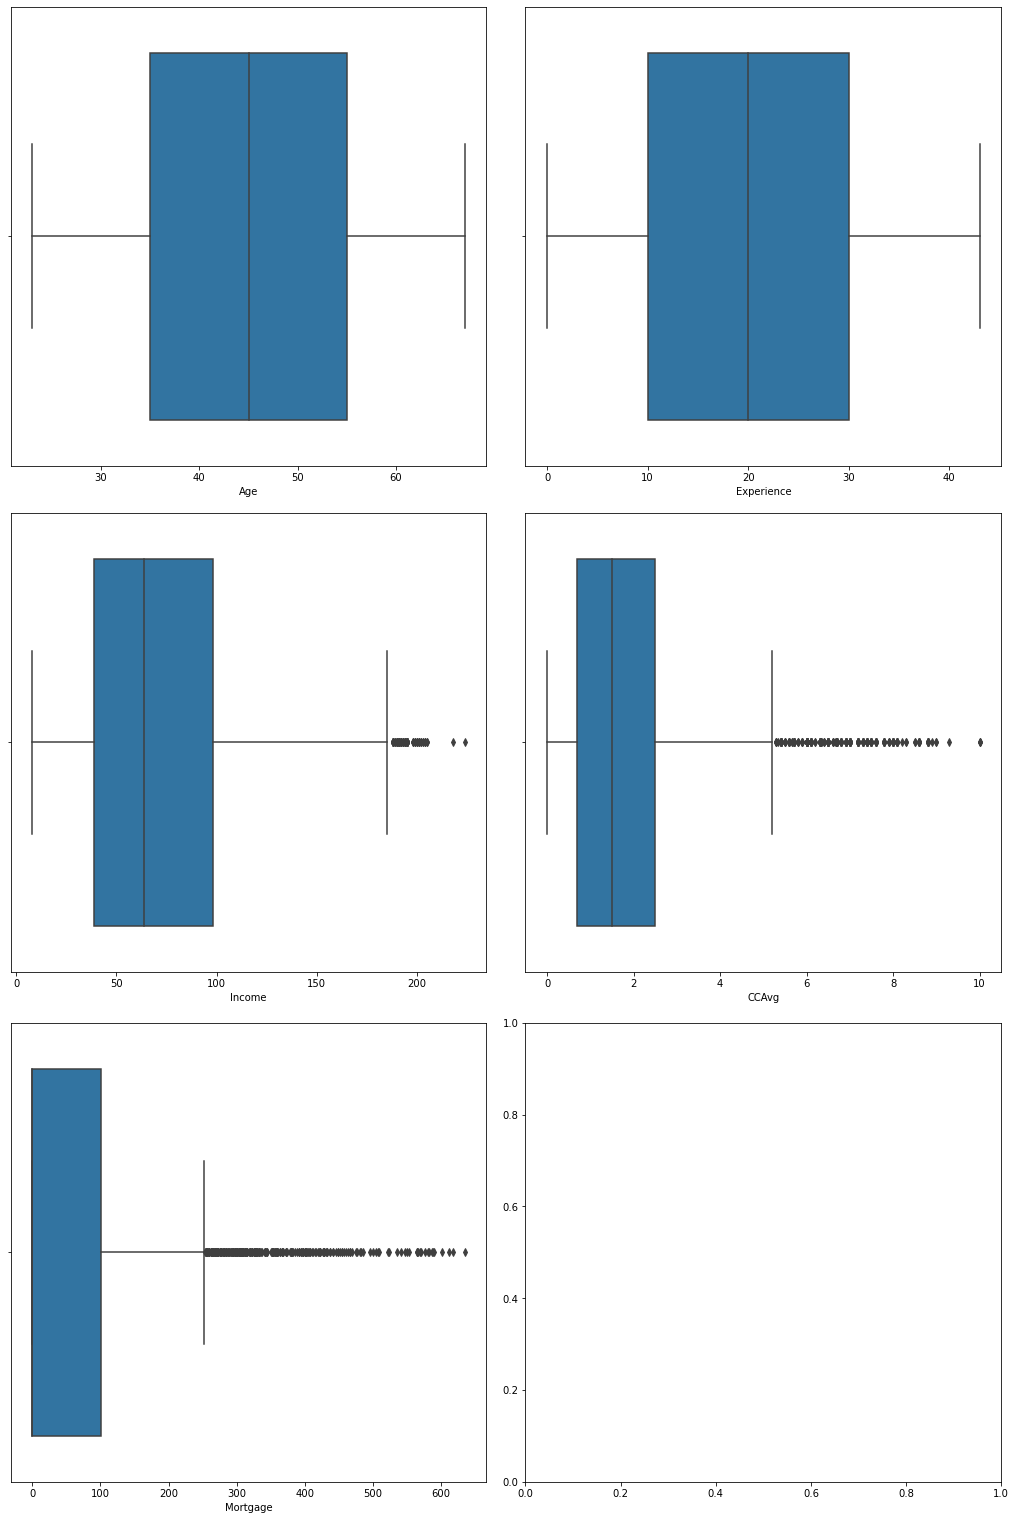

In [10]:
independent_var = ['Age','Experience','Income','CCAvg','Mortgage']
plt.figure(figsize=(15,10))

num_plots = len(independent_var)
total_cols = 2
total_rows = num_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), constrained_layout=True)
for i, var in enumerate(independent_var):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.boxplot(x=var, data=df, ax=axs[row][pos])

Based on these findings I'd like to explore more in detail how income affects wheter or not someone accepts a loan.

First lets see how many people have a loan

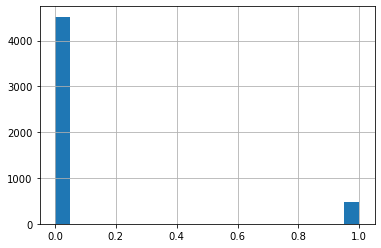

In [11]:
df['Personal Loan'].hist(bins=20)

Let's check how diferent variables againts income affect whether someone has a loan or not

In [57]:
from matplotlib.patches import Patch


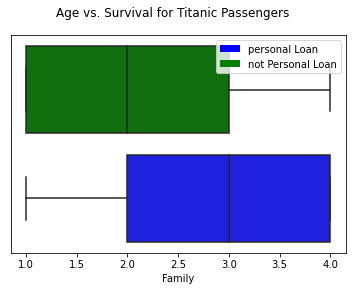

In [59]:
fig, ax = plt.subplots()

sns.boxplot(x="Family", y="Personal Loan", data=df, orient="h", palette={1:"blue", 0:"green"}, ax=ax)

ax.get_yaxis().set_visible(False)

fig.suptitle("Family Vs Personal Loan")

color_patches = [
    Patch(facecolor="blue", label="personal Loan"),
    Patch(facecolor="green", label="not Personal Loan")
]
ax.legend(handles=color_patches)

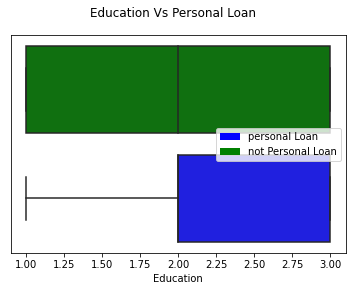

In [66]:
fig, ax = plt.subplots()

sns.boxplot(x="Education", y="Personal Loan", data=df, orient="h", palette={1:"blue", 0:"green"}, ax=ax)

ax.get_yaxis().set_visible(False)

fig.suptitle("Education Vs Personal Loan")

color_patches = [
    Patch(facecolor="blue", label="personal Loan"),
    Patch(facecolor="green", label="not Personal Loan")
]
ax.legend(handles=color_patches)

<Figure size 1080x720 with 0 Axes>

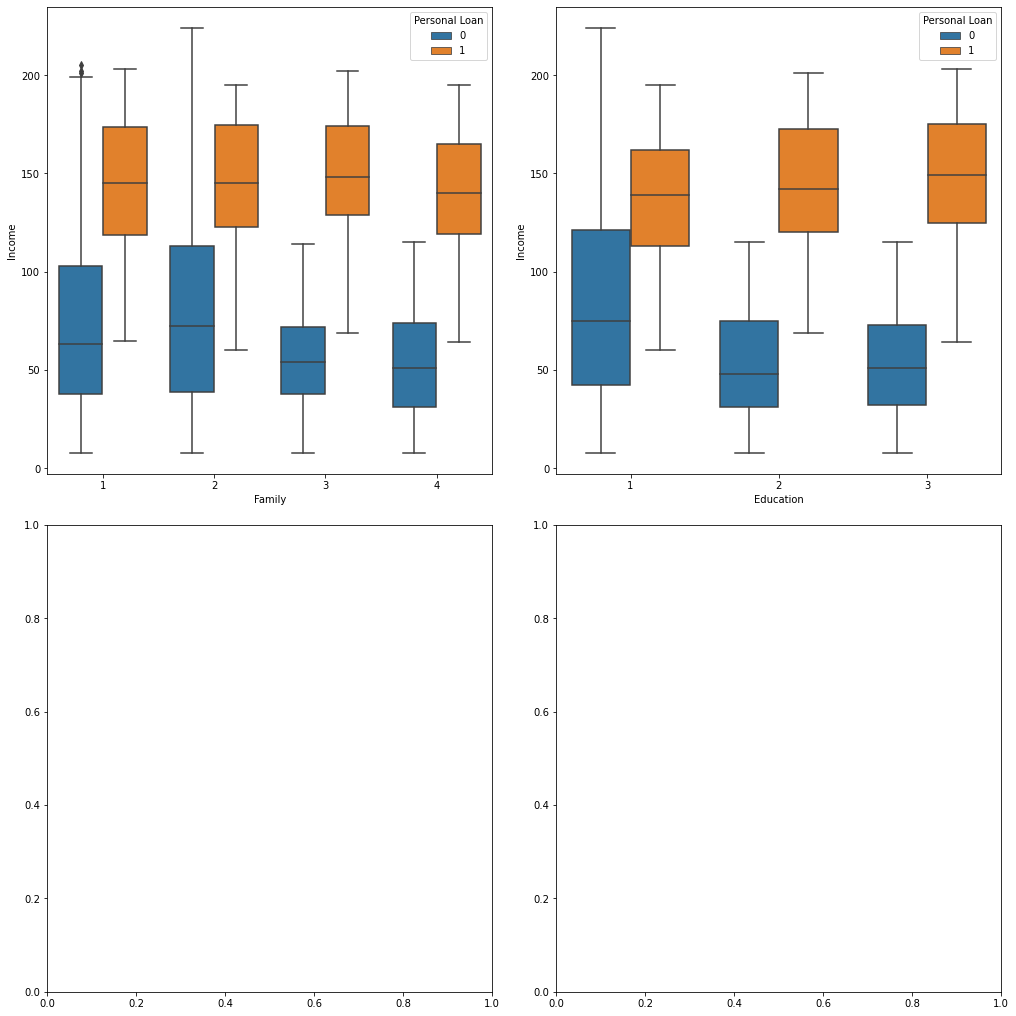

In [64]:
categorical_var = ['Family','Education']
plt.figure(figsize=(15,10))

num_plots = len(categorical_var)
total_cols = 2
total_rows = num_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), constrained_layout=True)
for i, var in enumerate(categorical_var):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.boxplot(x=var, y = 'Income', hue = 'Personal Loan', data=df, ax=axs[row][pos])

Families with higher income are more likely to get a Loan, similar to Education, doesnt matter which level they are at, the higher the income the more chances of having a Loan, this can be seen in the different groups. 

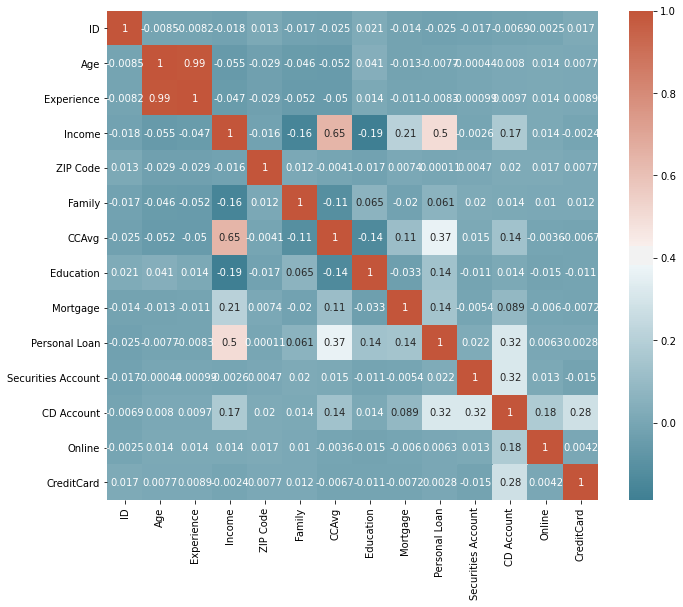

In [13]:
fig, ax = plt.subplots(figsize =(11,9))
corr = df.corr() #plot the heatmap
sns.heatmap(corr,xticklabels = corr.columns, yticklabels=corr.columns, annot = True, cmap= sns.diverging_palette(220,20,as_cmap = True))
plt.show()

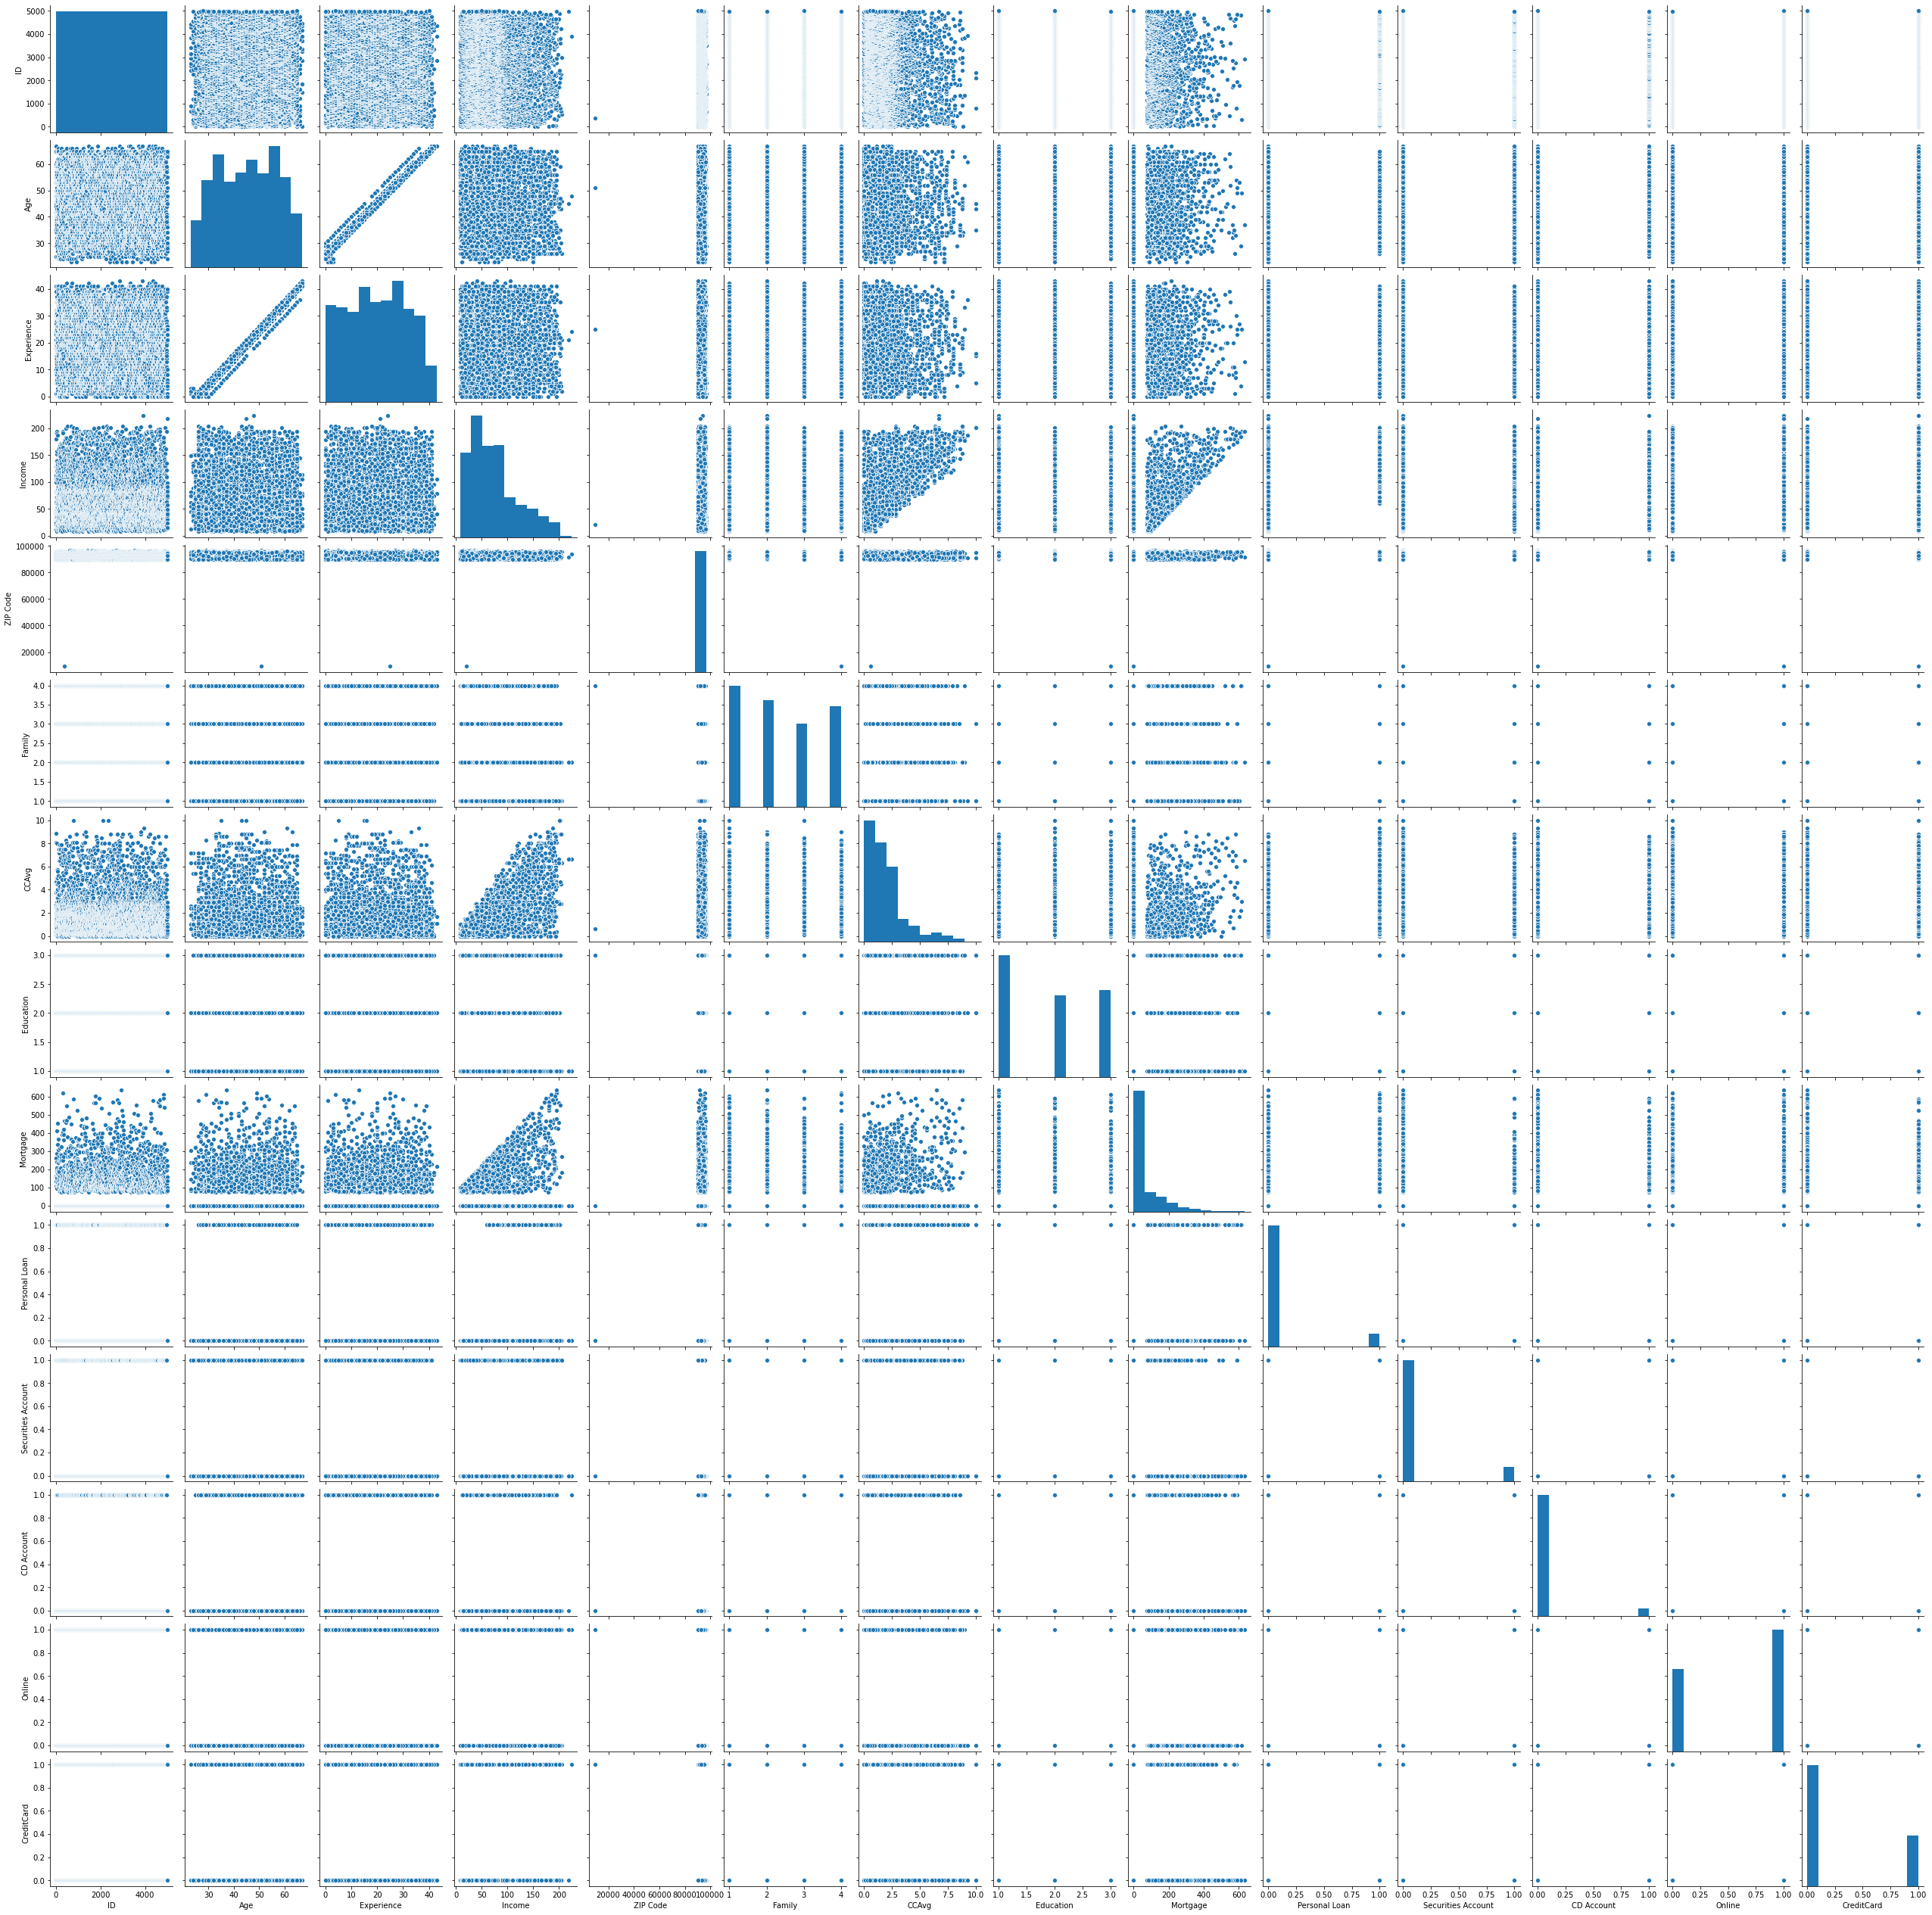

In [14]:
sns.pairplot(df)

In [15]:
#Percentage of customers with a credit card

customer_cc = (df['CreditCard'].value_counts()[1] *100)/5000
customer_cc

29.4

In [16]:
#Percentage of customers that use Online Banking
online = (df['Online'].value_counts()[1] *100)/5000
online

59.68

In [17]:
(df['CD Account'].value_counts()[1] *100)/5000

6.04

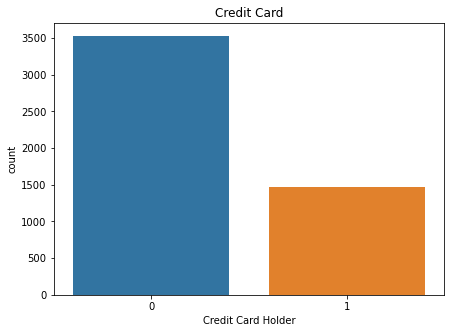

In [18]:
plt.figure(figsize = (7,5))
sns.countplot(df['CreditCard'])
plt.xlabel('Credit Card Holder')
plt.title('Credit Card')
#plt.savefig('Images/target.pdf')
plt.show()

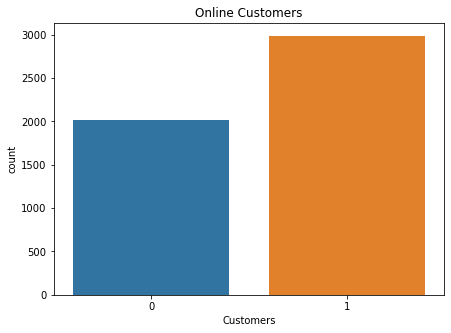

In [19]:
plt.figure(figsize = (7,5))
sns.countplot(df['Online'])
plt.xlabel('Customers')
plt.title('Online Customers')
#plt.savefig('Images/target.pdf')
plt.show()

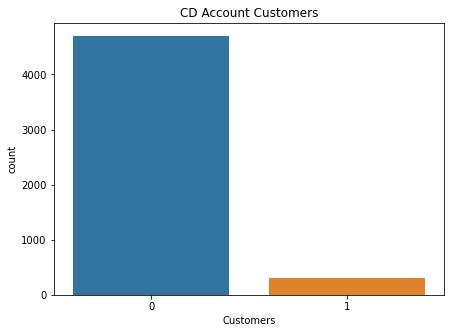

In [20]:
plt.figure(figsize = (7,5))
sns.countplot(df['CD Account'])
plt.xlabel('Customers')
plt.title('CD Account Customers')
#plt.savefig('Images/target.pdf')
plt.show()

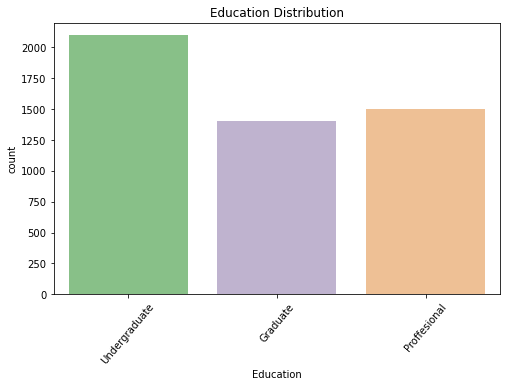

In [21]:

# Define bins based on statistics
edu_cats = [0,1,2,3]
edu_labels = ['Undergraduate','Graduate', 'Proffesional']
    
# Map to bins using pd.cut()
edu = pd.cut(df['Education'], bins = edu_cats, labels = edu_labels)

# Plot job distribution amongst subscribers
plt.figure(figsize = (8,5))
sns.countplot(edu, palette = 'Accent')
plt.title("Education Distribution")
plt.xticks(rotation = 50)
plt.show()

In [22]:
(df['CD Account'].value_counts()[1] *100)/5000

6.04

In [23]:
under = (edu.value_counts()[0]*100)/5000
grad = (edu.value_counts()[1]*100)/5000
prof = (edu.value_counts()[2]*100)/5000

print(f'undergrduate: {under}%')
print(f'Graduate: {grad}%')
print(f'Proffesional: {prof}%')

undergrduate: 41.92%
Graduate: 28.06%
Proffesional: 30.02%


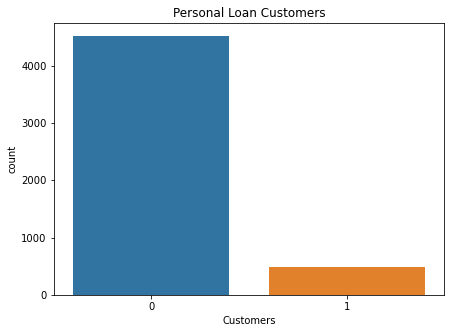

In [24]:
plt.figure(figsize = (7,5))
sns.countplot(df['Personal Loan'])
plt.xlabel('Customers')
plt.title('Personal Loan Customers')
#plt.savefig('Images/target.pdf')
plt.show()

### Data Analysis overview

With all the information above we can conclude a number of things: 
1. Education is a categorical variable
2.  59.6% users use online banking
3. 29.4% of customers have a credit card
4. Age is normally distributed, most of the customers have an age between 30 and 60 years. 
5. Low number of customers (6%) have a CD account,
6. Income, Mortgage, CCavg have a postive skewed distribution
7. Experience has negative values(need to get fix that) 


# KNN Algorithm 

## Complementary code

In [25]:
class_names = ["Accept","Reject"]

def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
    
def confusion_heatmap_metrics(predictions):
    df_table = confusion_matrix(y_test,predictions)
    sns.heatmap(df_table, annot=True, fmt='0.2f', xticklabels=['Accept', 'Reject'], yticklabels=['Accept', 'Reject'])
    plt.ylabel('Predicted Values')
    plt.xlabel('Actual Values')
    plt.show()
    
    
    
def plot_conf_matrix(cm,X_train, y_train,X_test, y_test,class_names):
        fig, axes = plt.subplots(1,2, figsize = (15,8), sharey = 'row')
        plot_confusion_matrix(estimator = cm, X=X_train, y_true=y_train,
                              display_labels=class_names,
                              cmap=plt.cm.Blues, ax=axes[0])
        axes[0].set_title("Training Confusion Matrix " + str(cm))
        plot_confusion_matrix(estimator = cm, X=X_test, y_true=y_test,
                              display_labels=class_names,
                              cmap=plt.cm.Blues, ax=axes[1])
        axes[1].set_title("Testing Confusion Matrix" + str(cm))
        plt.show() 


## Pre processing data

Firstly the data needs to be processed for KNN

First lets split the data. This first split will be used for testing our final model. We need the data to be as new to us as possible. 

In [26]:
train_set, test_set = train_test_split(df, test_size = 400 , stratify=df['Personal Loan'], random_state = 0)
print(f'Train set Shape: {train_set.shape}')
print(f'Test set Shape: {test_set.shape}')

Train set Shape: (4600, 14)
Test set Shape: (400, 14)


ID, Zipcode and Experience need to be dropped.

In [27]:
df_clf =df.drop(['ID','ZIP Code','Experience'], axis =1 )


In [28]:
df_clf.head(5)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


Hot encoding categorical data (Education and Family)

In [29]:
# Define one-hot encoding function
def one_hot_encode(df, catcols):
    '''Returns df with dummy vars and drops original column'''
    
    # Create DataFrame with above columns
    dfonehot = df[catcols].astype('category')
    
    # Get dummy variables and drop first one to not create dependency
    dfonehot = pd.get_dummies(dfonehot, drop_first = True)
    
    # Recreate DataFrame with one-hot encoded variables
    df = pd.concat([df,dfonehot], axis=1)
    
    # Drop columns where we have done one-hot encoding
    df = df.drop(catcols, axis = 1)
        
    return df

In [30]:
categorical_var = ['Family','Education']
df_clf = one_hot_encode(df_clf, categorical_var)
df_clf.head(5)

,Age,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3
0,25,49,1.6,0,0,1,0,0,0,0,0,1,0,0
1,45,34,1.5,0,0,1,0,0,0,0,1,0,0,0
2,39,11,1.0,0,0,0,0,0,0,0,0,0,0,0
3,35,100,2.7,0,0,0,0,0,0,0,0,0,1,0
4,35,45,1.0,0,0,0,0,0,1,0,0,1,1,0


In [31]:
labels = df_clf['Personal Loan']
df_clf.drop('Personal Loan', axis =1, inplace = True)

## Create training and test sets

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df_clf, labels, test_size=0.30, random_state=42)

## Normalizing the data

Data needs to be normalized before attempting to create the base model, this will help to improve the model accuracy. Normalization gives equal importance to each variable so that no single variable steers model performance in onde riection just becayse they have bigger numbers.

In [33]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=df_clf.columns)
scaled_df_train.head()

,Age,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3
0,0.863721,-1.106854,-0.877185,0.295858,-0.339647,-0.253285,-1.218932,-0.651538,-0.588348,-0.502677,1.772572,-0.630685,1.529606
1,1.037984,-0.953684,-0.305492,-0.554379,-0.339647,-0.253285,-1.218932,-0.651538,-0.588348,1.989348,-0.564152,-0.630685,-0.653763
2,1.560773,-0.231599,-0.248322,-0.554379,-0.339647,-0.253285,0.820390,-0.651538,1.699673,-0.502677,-0.564152,-0.630685,-0.653763
3,-1.227433,-0.056548,-1.048693,0.199240,2.944233,-0.253285,-1.218932,-0.651538,-0.588348,-0.502677,-0.564152,-0.630685,-0.653763
4,1.386510,1.234454,-0.362661,1.928699,-0.339647,-0.253285,-1.218932,-0.651538,-0.588348,-0.502677,-0.564152,-0.630685,-0.653763


# Baseline Model

## Fit KNN algorithm

For my Base line model I will be using KNN with generict parameters.

In [34]:
# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier()

# Fit the classifier
clf.fit(scaled_data_train, y_train)

# Predict on the test set
test_preds = clf.predict(scaled_data_test)

In [35]:
print_metrics(y_test, test_preds)

Precision Score: 0.989010989010989
Recall Score: 0.5732484076433121
Accuracy Score: 0.9546666666666667
F1 Score: 0.7258064516129032


I will be using F1 score (is weighted harmonic mean of precission and recall) to measure the quality of predicition of the ML Model. In this case is 73%. 

In [36]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [37]:
find_best_k(scaled_data_train, y_train, scaled_data_test, y_test)

Best Value for k: 3
F1-Score: 0.7799227799227798


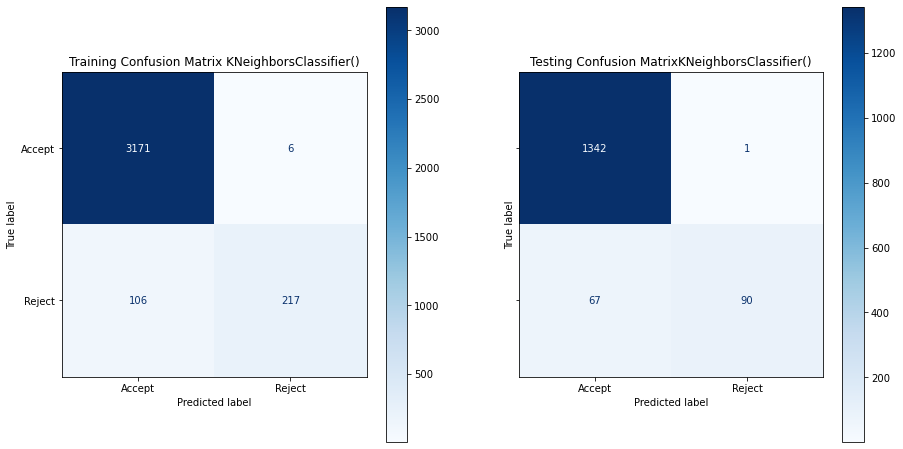

In [38]:
plot_conf_matrix(clf,scaled_data_train, y_train,scaled_data_test, y_test,class_names)

Confusi

## Other Machine learning classifiers

I wanted to plot in a table all the results of most of the Classifiers. Therefore, I needed to create a dictionary with the classifiers, this include, Logistic Regression, KNN, Decisiton Tree, Random Forest, Adaboost and Gradient Boosting

In [39]:

# Create a dictionary of classifiers
clf_dict = {
    'LR': LogisticRegression(random_state = random_state),
    'KNN': KNeighborsClassifier(),
    'DT': DecisionTreeClassifier(random_state = random_state),
    'RF': RandomForestClassifier(random_state = random_state),
    'AB': AdaBoostClassifier(random_state = random_state),
    'GB': GradientBoostingClassifier(random_state = random_state),
    'XGBoost' : xgb.XGBClassifier()

}

In [40]:

# Define function to batch classify

def batch_clf(X_train, y_train, X_test, y_test, clf_dict):
    '''
    Fits a dictionary of classifiers, makes predictions and returns metrics
    
    Args:
        X_train: {array-like, sparse matrix} of shape (n_samples, n_features) train input values
        y_train: array-like of shape (n_samples,) train target values
        X_test: {array-like, sparse matrix} of shape (m_samples, m_features) test input values
        y_test: array-like of shape (m_samples,) test target values
        clf_dict: dictionary with key name of classifier and value classifier instance        
    Returns:
        Results dataframe
    '''
    # Create empty DataFrame to store results
    times = []
    train_acc_scores = []
    test_acc_scores = []
    train_f1_scores = []
    test_f1_scores = []
    train_precision_scores = []
    test_precision_scores = []
    train_recall_scores = []
    test_recall_scores = []
    train_roc_data = []
    test_roc_data = []
    test_profit_scores = []
    
    # Loop through dictionary items
    for key, clf in clf_dict.items():
        start_time =time.time()
        
        # Fit classifier
        clf_fitted = clf.fit(X_train,y_train)
        
        # Get Predictions
        train_preds = clf_fitted.predict(X_train)
        test_preds = clf_fitted.predict(X_test)
                
        
        #Get F1 Scores
        train_f1 = f1_score(y_train, train_preds)
        train_f1_scores.append(round(train_f1,2))
        test_f1 = f1_score(y_test, test_preds)
        test_f1_scores.append(round(test_f1,2))
        
        
        # Get Precision Scores
        train_precision = precision_score(y_train, train_preds)
        train_precision_scores.append(round(train_precision,2))
        test_precision = precision_score(y_test, test_preds)
        test_precision_scores.append(round(test_precision,2))
        
        
        # Get Recall Scores
        train_recall = recall_score(y_train, train_preds)
        train_recall_scores.append(round(train_recall,2))
        test_recall = recall_score(y_test, test_preds)
        test_recall_scores.append(round(test_recall,2))
        

        
        #Get accuracy scores
        train_acc = accuracy_score(y_train, train_preds)
        train_acc_scores.append(round(train_acc,2))
        test_acc = accuracy_score(y_test, test_preds)
        test_acc_scores.append(round(test_acc,2))
        
        # Get Probability Predictions
        train_hat = clf_fitted.predict_proba(X_train)
        train_proba = train_hat[:,1]
        fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_proba)
        train_roc_data.append([fpr_train, tpr_train, thresholds_train])
            
        test_hat = clf_fitted.predict_proba(X_test)
        test_proba = test_hat[:,1]
        fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_proba)
        test_roc_data.append([fpr_test, tpr_test, thresholds_test])

        end_time = time.time()
        time_elapsed = end_time - start_time
        times.append(round(time_elapsed,2))
        
        
    # Create results dataframe
    results = pd.DataFrame({'Model': list(clf_dict.keys()), 
                            'Time': times,
                            'Train Accuracy': train_acc_scores,
                            'Test Accuracy': test_acc_scores, 
                            'Train F1': train_f1_scores,
                            'Test F1': test_f1_scores,
                            'Train Precision' : train_precision_scores,
                            'Test Precision' : test_precision_scores,
                            'Train Recall': train_recall_scores,
                            'Test Recall': test_recall_scores
                           })
    #plot_conf_matrix(clf,X_train, y_train,X_test, y_test,class_names)
    # Plot side by side ROC curve
    fig, axes = plt.subplots(1,2, figsize = (13,6))
    
    for i in range(len(train_roc_data)):
        axes[0].plot(train_roc_data[i][0], train_roc_data[i][1], lw=4, \
                 label= f'{list(clf_dict.keys())[i]}')
        
    for i in range(len(test_roc_data)):
        axes[1].plot(test_roc_data[i][0], test_roc_data[i][1], lw=4, \
                 label= f'{list(clf_dict.keys())[i]}')    
        
    for ax in axes:
        ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.legend(loc='lower right')
    axes[0].set_title('Receiver operating characteristic (ROC) Curve \n Training Set')
    axes[1].set_title('Receiver operating characteristic (ROC) Curve \n Test Set')
    plt.show()

    return results

C:\Users\EC\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:19:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


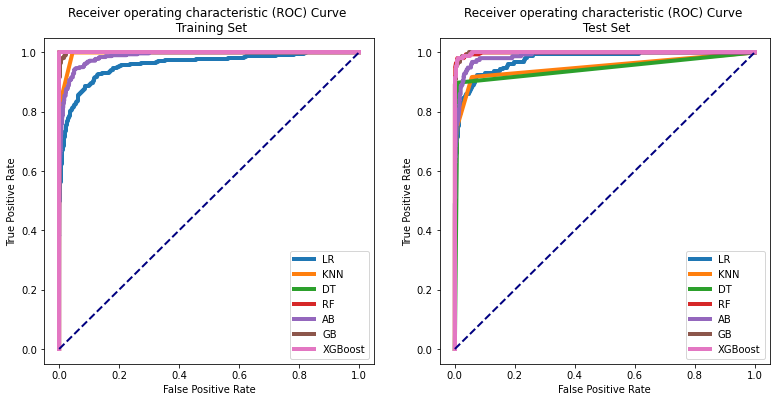

,Model,Time,Train Accuracy,Test Accuracy,Train F1,Test F1,Train Precision,Test Precision,Train Recall,Test Recall
0,LR,0.02,0.96,0.96,0.75,0.80,0.87,0.90,0.65,0.73
1,KNN,0.57,0.97,0.95,0.79,0.73,0.97,0.99,0.67,0.57
2,DT,0.02,1.00,0.98,1.00,0.91,1.00,0.92,1.00,0.90
3,RF,0.35,1.00,0.99,1.00,0.95,1.00,0.99,1.00,0.91
4,AB,0.22,0.97,0.97,0.83,0.83,0.89,0.88,0.78,0.78
5,GB,0.36,0.99,0.99,0.95,0.94,0.99,0.97,0.92,0.92
6,XGBoost,0.57,1.00,0.99,1.00,0.95,1.00,0.97,1.00,0.93


In [41]:
results = batch_clf(scaled_data_train, y_train, scaled_data_test, y_test, clf_dict)
results


Based on the models we can conclude that there is not overfitting in any of the classifiers. 

In [42]:
results.sort_values('Test F1', ascending = False)[:3][['Model','Test F1', 'Test Recall','Test Precision']]

,Model,Test F1,Test Recall,Test Precision
3,RF,0.95,0.91,0.99
6,XGBoost,0.95,0.93,0.97
5,GB,0.94,0.92,0.97


Without using GridSearch, the best model based on F1 score, is XGBoost followed by Random Forest. 

### GridsearchCV 

I will now do a hyperparameter tunning using GridSearchCV. 

As done previously, this will be done to all the Classifiers, each classifier has different parameters, therefore I have to create a function that will deal with choosing the correct set of parameters for each classifier. 

Gridsearch will also be used to avoid overfitting and perform  cross-validation.

In [43]:
# Define param grid
def find_params(name):
    if name == 'KNN': 
        params = {
        'clf__n_neighbors': [3, 5, 11, 15],
        'clf__weights': ['uniform', 'distance'],
        'clf__p': [1, 5]
        }
    elif name == 'LR':
        params = {
        'clf__solver': ['liblinear'],
        'clf__C': [0.1, 1],
        } 
    elif name == 'RF':
        params =  {
        'clf__max_features': [2, 3],
        'clf__min_samples_leaf': [3, 4, 5],
        'clf__min_samples_split': [8, 10, 12],
        'clf__n_estimators': [100]
    }
    elif name == 'DT':
        params =  {
        'clf__max_depth': [5, 25, 50],
        'clf__criterion': ['gini', 'entropy'],
        'clf__min_samples_split': [3, 5, 10],
        }
    elif name == 'AB':
        params = {
        'clf__n_estimators' : [20, 50, 100, 200],
        'clf__learning_rate' : [0.5, 1, 1.5]
        }
    elif name == 'GB': 
        params = {
        'clf__n_estimators' : [20, 50, 100, 200],
        'clf__max_depth' : [3, 5, 10, 15],
        'clf__min_samples_split' : [2, 3, 5]
        }
    elif name == 'XGBoost':
        params = {
            'clf__n_estimators': [20, 50, 100, 200],
            'clf__max_depth': [3, 5, 10, 15],
            'clf__min_child_weight': [2, 3, 5]
            }
    return params

In [44]:
def grid_search(clf_dict):
    
    #Create lists to store the data. 
    times = []
    train_acc_scores = []
    test_acc_scores = []
    train_f1_scores = []
    test_f1_scores = []
    train_precision_scores = []
    test_precision_scores = []
    train_recall_scores = []
    test_recall_scores = []
    train_roc_data = []
    test_roc_data = []
    test_profit_scores = []
    
    
    
    for k, val in clf_dict.items():
        start_time =time.time()
        clf = val
        
        #create pipeline
        pipeline = Pipeline([('scaler', StandardScaler()),('clf', val)])
        param = find_params(k)
        cv = 5 
        
        gs = GridSearchCV(estimator = pipeline,
                             param_grid = param,
                             scoring = 'f1', 
                             cv = 5 ,
                             n_jobs = -1,
                             refit = True)
        
        #fit classifier
        gs_fitted = gs.fit(scaled_data_train, y_train)
        
        #get predictions
        gs_train_preds = gs.predict(scaled_data_train)
        gs_test_preds = gs.predict(scaled_data_test)
        
        
        #Get F1 Scores
        train_f1 = f1_score(y_train, gs_train_preds)
        train_f1_scores.append(round(train_f1,2))
        test_f1 = f1_score(y_test, gs_test_preds)
        test_f1_scores.append(round(test_f1,2))
        
        
        # Get Precision Scores
        train_precision = precision_score(y_train, gs_train_preds)
        train_precision_scores.append(round(train_precision,2))
        test_precision = precision_score(y_test, gs_test_preds)
        test_precision_scores.append(round(test_precision,2))
        
        
        # Get Recall Scores
        train_recall = recall_score(y_train, gs_train_preds)
        train_recall_scores.append(round(train_recall,2))
        test_recall = recall_score(y_test, gs_test_preds)
        test_recall_scores.append(round(test_recall,2))
        

        
        #Get accuracy scores
        train_acc = accuracy_score(y_train, gs_train_preds)
        train_acc_scores.append(round(train_acc,2))
        test_acc = accuracy_score(y_test, gs_test_preds)
        test_acc_scores.append(round(test_acc,2))
        
        
        
        # Get Probability Predictions
        train_hat = gs_fitted.predict_proba(X_train)
        train_proba = train_hat[:,1]
        fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_proba)
        train_roc_data.append([fpr_train, tpr_train, thresholds_train])
            
        test_hat = gs_fitted.predict_proba(X_test)
        test_proba = test_hat[:,1]
        fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_proba)
        test_roc_data.append([fpr_test, tpr_test, thresholds_test])

        
        
        end_time = time.time()
        time_elapsed = end_time - start_time
        times.append(round(time_elapsed,2))
        
    # Create results dataframe
    gs_results = pd.DataFrame({'Model': list(clf_dict.keys()), 
                            'Time': times,
                            'Train Accuracy': train_acc_scores,
                            'Test Accuracy': test_acc_scores, 
                            'Train F1': train_f1_scores,
                            'Test F1': test_f1_scores,
                            'Train Precision' : train_precision_scores,
                            'Test Precision' : test_precision_scores,
                            'Train Recall': train_recall_scores,
                            'Test Recall': test_recall_scores
                           })
    
     #plot_conf_matrix(clf,X_train, y_train,X_test, y_test,class_names)
    # Plot side by side ROC curve
    fig, axes = plt.subplots(1,2, figsize = (13,6))
    
    for i in range(len(train_roc_data)):
        axes[0].plot(train_roc_data[i][0], train_roc_data[i][1], lw=4, \
                 label= f'{list(clf_dict.keys())[i]}')
        
    for i in range(len(test_roc_data)):
        axes[1].plot(test_roc_data[i][0], test_roc_data[i][1], lw=4, \
                 label= f'{list(clf_dict.keys())[i]}')    
        
    for ax in axes:
        ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.legend(loc='lower right')
        axes[0].set_title('Receiver operating characteristic (ROC) Curve \n Training Set')
        axes[1].set_title('Receiver operating characteristic (ROC) Curve \n Test Set')
        plt.show()
    
        
    return gs_results 

C:\Users\EC\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:20:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


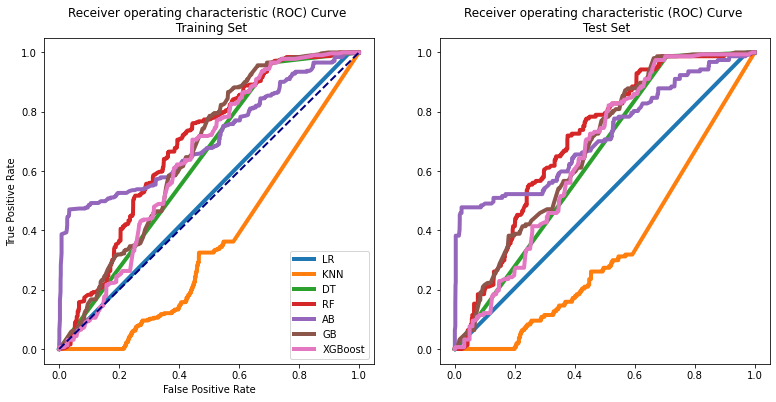

,Model,Time,Train Accuracy,Test Accuracy,Train F1,Test F1,Train Precision,Test Precision,Train Recall,Test Recall
0,LR,2.25,0.96,0.96,0.74,0.80,0.87,0.90,0.65,0.73
1,KNN,7.66,1.00,0.96,1.00,0.75,1.00,0.98,1.00,0.61
2,DT,0.26,1.00,0.99,1.00,0.93,1.00,0.94,1.00,0.92
3,RF,6.86,0.99,0.99,0.95,0.94,1.00,0.99,0.91,0.89
4,AB,5.43,0.97,0.97,0.84,0.83,0.90,0.88,0.79,0.78
5,GB,36.20,1.00,0.99,1.00,0.93,1.00,0.97,1.00,0.90
6,XGBoost,17.72,1.00,0.99,1.00,0.97,1.00,0.99,1.00,0.95


In [45]:
gs_res = grid_search(clf_dict)
gs_res

In [46]:
gs_res.sort_values('Test F1', ascending = False)[:3][['Model','Test F1', 'Test Recall','Test Precision']]

,Model,Test F1,Test Recall,Test Precision
6,XGBoost,0.97,0.95,0.99
3,RF,0.94,0.89,0.99
2,DT,0.93,0.92,0.94


Based on these findings, I can conclude thatXGBoost is the classifier that works best with this data set. 
Precission and Recall are 98% and 96%, respectively, while F1 is 96%. XGBoost Roc curve is 

In [47]:
# Instantiate classifier
xgboost = xgb.XGBClassifier(random_state = random_state)

# Define pipeline
pipeline = Pipeline([('scaler', StandardScaler()),('clf', xgboost)])
# Define parameter grid
XGB_params = {
    'clf__n_estimators': [50],
    'clf__max_depth': [10],
    'clf__min_child_weight': [2]
}

# Set cv to 5
cv = 5

# Define GridSearch
gs_xgboost = GridSearchCV(estimator = pipeline, 
                          param_grid = XGB_params,
                          scoring = 'f1',
                          cv = cv)

# Fit classifier
gs_xgboost_fitted = gs_xgboost.fit(scaled_data_train,y_train)
        
# Get Predictions
train_preds = gs_xgboost_fitted.predict(scaled_data_train)
test_preds = gs_xgboost_fitted.predict(scaled_data_test)

# Get Probabilities
train_hat = gs_xgboost_fitted.predict_proba(scaled_data_train)
train_proba = train_hat[:,1]
test_hat = gs_xgboost_fitted.predict_proba(scaled_data_test)
test_proba = test_hat[:,1]

C:\Users\EC\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\EC\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:20:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\EC\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\EC\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:20:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\EC\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\EC\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:20:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [48]:
# Get best parameters
XGB_best_params = gs_xgboost.best_params_
XGB_best_params

{'clf__max_depth': 10, 'clf__min_child_weight': 2, 'clf__n_estimators': 50}

## Interpret

I need to find the most important values for XGBoost classifier. This will help me understand what the classifier is looking for when modelling. 

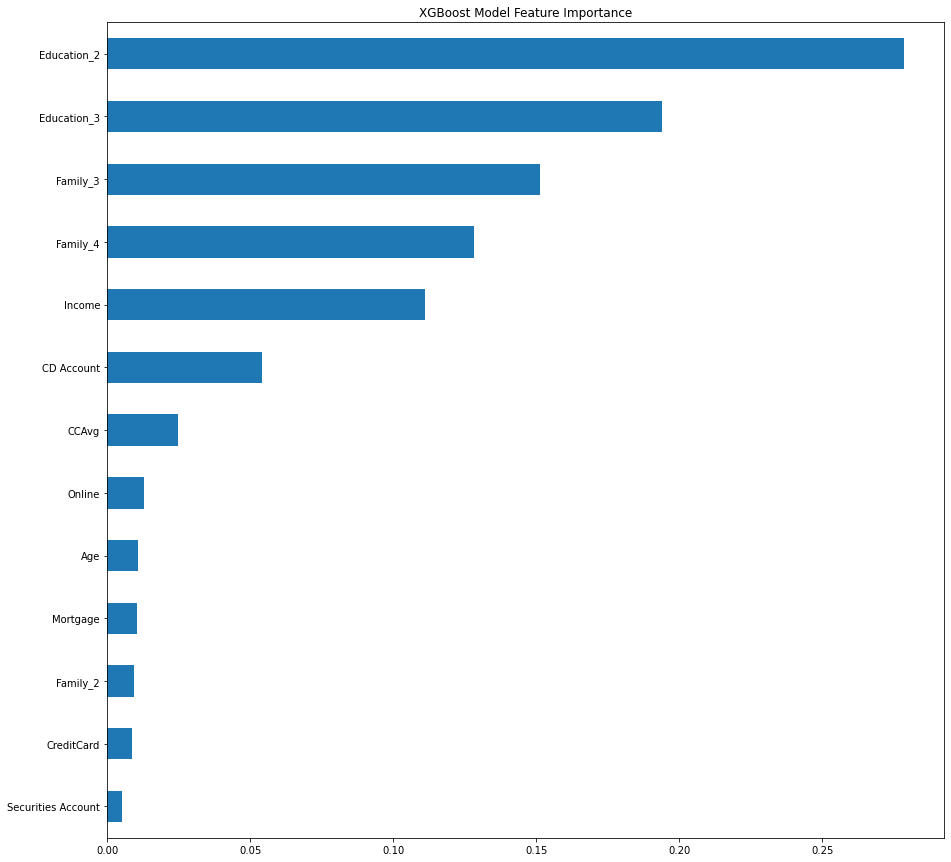

In [49]:

# Create Pandas series with feature importances 
feats = pd.Series(gs_xgboost.best_estimator_[1].feature_importances_, index = X_train.columns)
# Sort values
feats = feats.sort_values(ascending = True)
# Drop null values
feats = feats[feats != 0]
# Plot bar plot
feats.plot(kind = 'barh', figsize = (15,15))
plt.title('XGBoost Model Feature Importance')
plt.show()

The most important variables are as follow: 
 - Education 3 (Advanced/ Proffesional)
 - Education 2 (Graduate) 
 - Family Size (especially of 3 and 4)
 - Income 
 - CD Account

## Working with normal data

I want to test the classifier and see if how it behaves with uncleaned data. This the closer it will get to a real life case scenario. First, I will use X_test partition of the dataset I did before. 

In [68]:
# Define X_test
X_test = df.drop('Personal Loan', axis =1 ).reset_index(drop = True)

# Define y_test
y_test = df['Personal Loan'].reset_index(drop = True)

Create a Final Pipeline with the best params found with GridSearchCV.

In [69]:
final_pipeline = Pipeline([('scaler', StandardScaler()),('clf', xgb.XGBClassifier(random__state = random_state,
                                                                                 max_depth = 3,
                                                                                 min_child_weight = 2,
                                                                                 n_estimators = 20))])


In [70]:
# Create copy
df_copy = train_set.reset_index(drop = True)

# Define y
y = df_copy['Personal Loan']

# Define X and check by calling head
X = df_copy.drop('Personal Loan', axis = 1)
X.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,2963,23,2,81,91711,2,1.8,2,0,0,0,0,0
1,428,32,7,35,92521,3,1.3,1,116,0,0,0,1
2,2141,53,27,89,92130,1,0.8,3,0,1,0,1,0
3,4107,48,22,54,93106,1,1.2,2,0,0,0,0,0
4,354,53,29,55,95818,4,1.1,2,0,0,0,1,0


Fit the pipeline to the data created before

In [71]:
final_pipeline.fit(X,y)


[13:05:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { random__state } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:05:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\EC\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=3, min_child_weight=2, missing=nan,
                               monotone_constraints='()', n_estimators=20,
                               n_jobs=8, num_parallel_tree=1, random__state=0,
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

In [72]:
# Define X_test
X_test = test_set.drop('Personal Loan', axis =1 ).reset_index(drop = True)

# Define y_test
y_test = test_set['Personal Loan'].reset_index(drop = True)

# Get test set predictions
#test_preds = final_pipeline.predict(X_test)

## Answer to problem

Putting both tables together to check the probability of getting a personal Loan based on the GXBoost

In [73]:
pos_proba = final_pipeline.predict_proba(X_test)[:,1]
# Transform into Pandas Series
pos_proba_s = pd.Series(pos_proba)

# Concatenate dataframes to be able to get attributes
test_set_with_proba = pd.concat([X_test, y_test, pos_proba_s], axis = 1)

# Rename column
test_set_with_proba = test_set_with_proba.rename(columns = {0: 'probability'})

# View dataframe
test_set_with_proba.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan,probability
0,199,27,3,59,94123,4,0.0,1,90,1,0,1,0,0,0.001312
1,3037,33,9,14,91320,4,0.7,2,105,0,0,1,0,0,0.001312
2,3312,49,25,24,95819,1,0.3,1,0,0,0,0,0,0,0.001312
3,669,66,41,18,94010,3,0.5,1,0,0,0,0,0,0,0.001312
4,4694,52,28,20,95616,1,0.3,1,0,0,0,0,0,0,0.001312


Now there are 400 possible customers that will be chosen based on the probability of accepting a Loan being higher than 50%.

In [74]:
# Get top 400
top_400 = test_set_with_proba.sort_values('probability', ascending = False)[:400]
top_400

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan,probability
256,2879,45,19,122,94590,4,4.1,2,0,0,0,1,0,1,0.992465
172,2913,44,20,130,90291,4,3.2,2,0,0,0,0,0,1,0.992465
357,2216,28,3,193,94501,3,4.0,2,0,0,0,1,0,1,0.991370
164,3615,34,10,154,94583,3,5.4,2,0,0,0,1,0,1,0.990995
141,3844,32,7,129,94720,4,5.2,2,0,0,0,0,1,1,0.989761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,2533,53,28,19,94608,4,0.8,1,106,0,0,0,1,0,0.001312
79,4551,65,40,18,95621,1,1.5,2,0,0,0,1,0,0,0.001312
78,4913,51,26,28,94061,1,1.3,2,94,1,0,1,0,0,0.001312
250,3368,51,27,53,92122,1,1.6,2,0,0,0,1,0,0,0.001312


In [75]:
top_400.loc[top_400['probability'] > 0.5]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan,probability
256,2879,45,19,122,94590,4,4.10,2,0,0,0,1,0,1,0.992465
172,2913,44,20,130,90291,4,3.20,2,0,0,0,0,0,1,0.992465
357,2216,28,3,193,94501,3,4.00,2,0,0,0,1,0,1,0.991370
164,3615,34,10,154,94583,3,5.40,2,0,0,0,1,0,1,0.990995
141,3844,32,7,129,94720,4,5.20,2,0,0,0,0,1,1,0.989761
275,3948,32,8,119,94710,4,5.00,3,0,0,0,1,0,1,0.989761
167,723,45,21,132,91103,3,1.20,2,0,0,1,1,1,1,0.982309
359,48,37,12,194,91380,4,0.20,3,211,1,1,1,1,1,0.982309
192,300,41,15,159,90057,1,5.50,3,0,0,1,1,0,1,0.980722
123,1025,58,33,122,93711,4,0.20,2,0,0,1,1,0,1,0.978329


In [77]:
len(top_400.loc[top_400['probability'] > 0.5])

38

In [78]:
top_400['Personal Loan'].value_counts()

0    362
1     38
Name: Personal Loan, dtype: int64

Out of the 400 initial customers list, using this classiffier there was a short list of 38 customers in total. From which 35 actually took a loan with the bank. Proving that XGB Classifier has a 92.10% of success rate when used with un-cleaned un-normalized data.

# Conclussion
## Summary of findings and Recommendations

In this problem Bank XYL wanted to explore different ways to create marketing strategies with better target marketing increasing success ratio with minimal budget.
Bank XYL provided with the task to predict the likelyhood of a liability customer buying personal Loans. 
This will help the bank better aim the marketing strategies. 
Summary of key steps that lead to the results: 
    1. Data was gathered from the previous campaign, which included: age, Income, Family, CCA, Family, Education and more.
       There were 5000 entries available to train the algorithm
    2. Data was cleaned, fortunately there were not any null values in the data. 
    3. Categorical data was dealt with using one got encode 
    4. Data was normalized using StandardScaler
    5. F1 score was determined to be used as the measure of quality of prediction 
    6. KNN algorithm was the baseline model with a F1 score of 73% 
    7. Other classifiers were trained including;  Logistic Regression, KNN, Decisiton Tree, Random Forest, Adaboost, 
       Gradient Boosting and XGB
    8. This classifiers were further tuned using GridSearchCV, which pointed out that the best Classifier was XGB 
    9. XGB was used to find which were the most important variables when acquiring a Loan. 
    10. XGB has a probaility of 93% ot find the right customers that most likely will acquired a loan
    
This variables were: 
 - Education 3 (Advanced/ Proffesional)
 - Education 2 (Graduate) 
 - Family Size (especially of 3 and 4)
 - Income 
 - CD Account
#### Recomendations
 - Emphasize Professional and Graduates customers
 - Focus on customers with families larger than 2
 - Focus on customers with an anual income larger than 105k
 
 If the recommendations are taken, then there's a probability of 92% that the customers will acquire a loan. 

## Future Work

There are a number of things that could be improved in this project: 
    - More data: This dataset is relatively small, with only 5,000 entries. Perhaps, if the
    dataset had more entries the models would have behave differently.
    -Testing on new dataset: Once this marketing strategy has been tested in real life, with
    the new dataset I can further tune the models to find out more specific target
    customers.
    -Zip Code: Introducing Zipcode could change a lot in the models, specially looking into
    rich vs accommodate areas. This could be included in the models. 